In [5]:
import networkx as nx
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

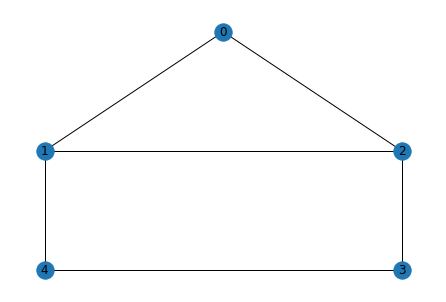

In [14]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(1,4)
G.add_edge(1,0)
G.add_edge(0,2)
pos = { 1: (0, 20), 2: (20, 20), 3: (20, 0), 4:(0,0), 0:(10, 40)}
nx.draw(G, with_labels = True, pos=pos)

In [69]:
def resistance_distances(G):
    n = len(G.nodes())

    distances = np.zeros((n,n))
    for s in G.nodes():
        for t in G.nodes():
            if s!=t:
                distances[s, t] = nx.algorithms.distance_measures.resistance_distance(G, s, t)
    return distances

def expected_distances_2018(G):
    n = len(G.nodes())
    L = nx.laplacian_matrix(G).toarray()
    L_mod = [x+1 for x in L] #adding 1 to solve be able to inverse matrix L
    L_inv = np.linalg.inv(L_mod)
    distances = np.zeros((n,n))
    for s in G.nodes():
        for t in G.nodes():
            if s<t:
                S = np.zeros(n)
                S[s] = 1
                S[t] = -1
                V = np.matmul(S, L_inv) # vector of potentials
                expected_distance = 0
                for u,v in G.edges:
                    expected_distance += abs(V[u]-V[v])
                distances[s, t] = expected_distance
                distances[t, s] = expected_distance
    return distances
    
def expected_distances_new(G):
    n = len(G.nodes())
    distances = np.zeros((n,n))

    for s in G.nodes():
        for t in G.nodes():
            if s!=t:
                paths = list(nx.all_simple_paths(G, s, t))
                sum_inv_lenghts = 0.0
                for path in paths:
                    sum_inv_lenghts += 1/(len(path)-1)
                expected_distance = 0
                for path2 in paths:
                    expected_distance +=  1/(len(path2)-1)/sum_inv_lenghts * (len(path2)-1)
                distances[s,t] = expected_distance
    return distances


In [66]:
res_distances = pd.DataFrame(resistance_distances(G)).round(2)
exp_distances = pd.DataFrame(expected_distances_2018(G)).round(2)
exp2_distances = pd.DataFrame(expected_distances_new(G)).round(2)


### Resistance Distance

{(0, 1): Text(5.0, 30.0, '0.64'),
 (0, 2): Text(15.0, 30.0, '0.64'),
 (0, 3): Text(15.0, 20.0, '1.18'),
 (0, 4): Text(5.0, 20.0, '1.18'),
 (1, 2): Text(10.0, 20.0, '0.55'),
 (1, 3): Text(10.0, 10.0, '0.91'),
 (1, 4): Text(0.0, 10.0, '0.73'),
 (2, 3): Text(20.0, 10.0, '0.73'),
 (2, 4): Text(10.0, 10.0, '0.91'),
 (3, 4): Text(10.0, 0.0, '0.73')}

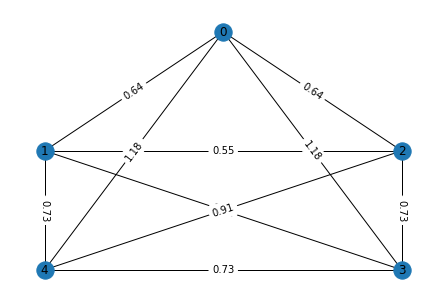

In [70]:
G_res = nx.from_numpy_matrix(np.matrix(res_distances))
nx.draw(G_res, pos=pos, with_labels=True)
grafo_labels = nx.get_edge_attributes(G_res,'weight')
nx.draw_networkx_edge_labels(G_res, edge_labels = grafo_labels, pos=pos)


### Expected Distance (2018)

{(0, 1): Text(5.0, 30.0, '1.64'),
 (0, 2): Text(15.0, 30.0, '2.73'),
 (0, 3): Text(15.0, 20.0, '1.91'),
 (0, 4): Text(5.0, 20.0, '1.55'),
 (1, 2): Text(10.0, 20.0, '2.18'),
 (1, 3): Text(10.0, 10.0, '2.27'),
 (1, 4): Text(0.0, 10.0, '1.73'),
 (2, 3): Text(20.0, 10.0, '2.09'),
 (2, 4): Text(10.0, 10.0, '3.18'),
 (3, 4): Text(10.0, 0.0, '2.73')}

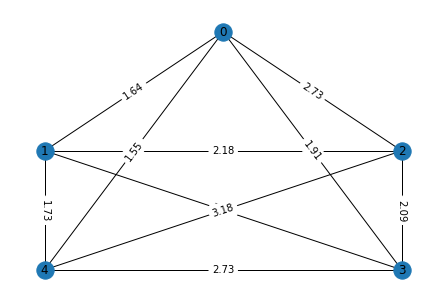

In [71]:
G_exp = nx.from_numpy_matrix(np.matrix(exp_distances))
nx.draw(G_exp, pos=pos, with_labels=True)
grafo_labels = nx.get_edge_attributes(G_exp,'weight')
nx.draw_networkx_edge_labels(G_exp, edge_labels = grafo_labels, pos=pos)

### New Expected Distance

{(0, 1): Text(5.0, 30.0, '1.71'),
 (0, 2): Text(15.0, 30.0, '1.71'),
 (0, 3): Text(15.0, 20.0, '2.82'),
 (0, 4): Text(5.0, 20.0, '2.82'),
 (1, 2): Text(10.0, 20.0, '1.64'),
 (1, 3): Text(10.0, 10.0, '2.25'),
 (1, 4): Text(0.0, 10.0, '1.89'),
 (2, 3): Text(20.0, 10.0, '1.89'),
 (2, 4): Text(10.0, 10.0, '2.25'),
 (3, 4): Text(10.0, 0.0, '1.89')}

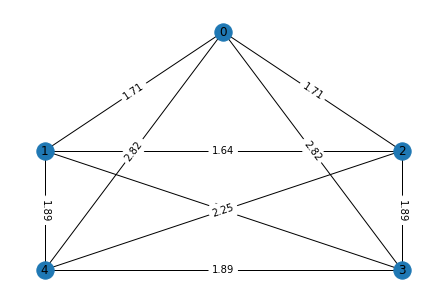

In [72]:
G_exp2 = nx.from_numpy_matrix(np.matrix(exp2_distances))
nx.draw(G_exp2, pos=pos, with_labels=True)
grafo_labels = nx.get_edge_attributes(G_exp2,'weight')
nx.draw_networkx_edge_labels(G_exp2, edge_labels = grafo_labels, pos=pos)
